https://www.kaggle.com/code/laowingkin/mbti-study-personality/data <br>
https://arxiv.org/pdf/2201.08717.pdf

In [1]:
# Import libraries and dependencies
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings("ignore")

In [3]:
csv_data = pd.read_csv("../data/mbti_1.csv")
csv_data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


### Perform  Exploratory Data Analysis (EDA)

In [4]:
# Get general information of the dataset
csv_data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [5]:
#  Split tweet in the posts column to a "word" (assuming 50 chars per word)
a_word = 50
csv_data['post_len'] = csv_data["posts"].str.len()
csv_data['words'] = csv_data['posts'].apply(lambda w: len(w.split())/a_word)
csv_data.reset_index(inplace=True)
csv_data = csv_data.rename(columns = {'index':'tweet_nbr'})

csv_data.head()

,tweet_nbr,type,posts,post_len,words
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,11.12
1,1,ENTP,'I'm finding the lack of me in these posts ver...,7053,23.40
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,16.72
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,21.28
4,4,ENTJ,'You're fired.|||That's another silly misconce...,6111,19.34


In [6]:
csv_data[csv_data.isnull().any(axis=1)]

,tweet_nbr,type,posts,post_len,words


<AxesSubplot:>

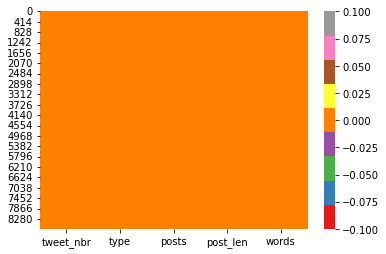

In [7]:
sns.heatmap(csv_data.isnull(), cmap='Set1')

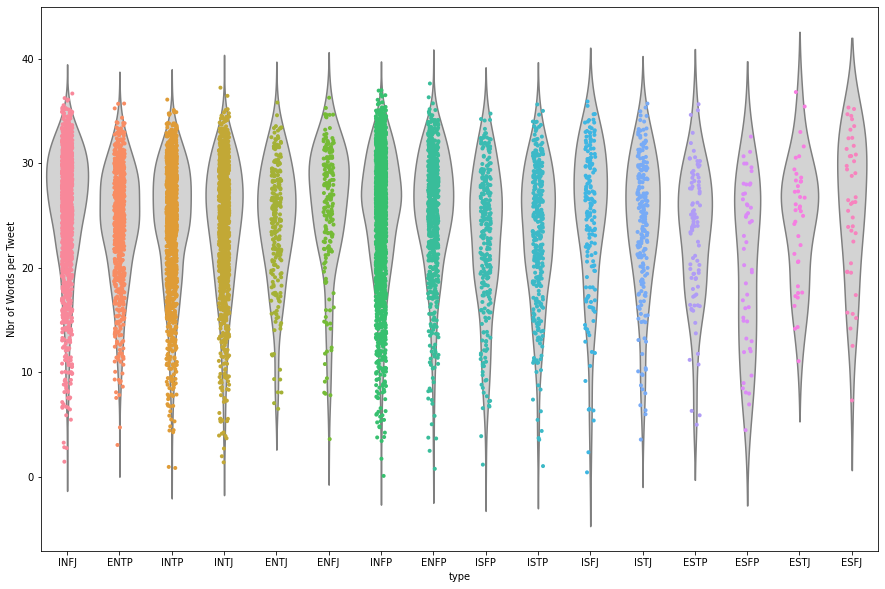

In [8]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words', data=csv_data, inner=None, color='lightgray')
sns.stripplot(x='type', y='words', data=csv_data, size=4, jitter=True)
plt.ylabel('Nbr of Words per Tweet')
plt.show()

In [13]:
plt.savefig("../images/pt_violin.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Nbr of Words per Tweet')

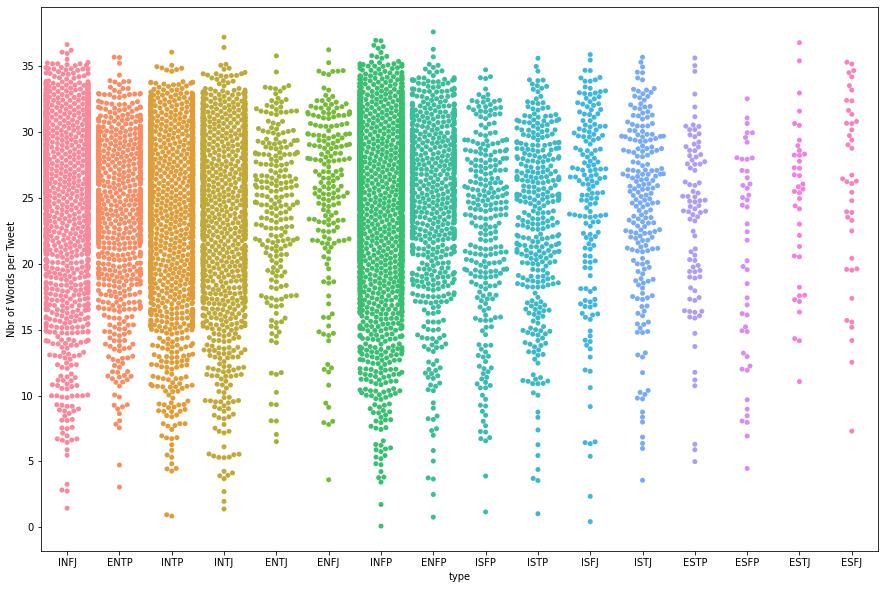

In [8]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words", data=csv_data)
plt.ylabel('Nbr of Words per Tweet')

In [14]:
plt.savefig("../images/pt_swarmplot.png")

<Figure size 432x288 with 0 Axes>

In [31]:
fig = px.histogram(csv_data,x='type',color="type", title='Personality type')
fig

In [34]:
fig.write_html("../images/pt_bar.html")

In [22]:
fig=px.pie(csv_data,names='type',title='Personality type',hole=0.1)
fig

In [21]:
fig.write_html("../images/pt_pie.html")

In [23]:
fig = px.histogram(csv_data, y="tweet_nbr", color="type", title='Personality type mentioned in each Tweet')
fig

In [25]:
fig.write_html("../images/pt_hist.html")

In [26]:
csv_data.describe()

,tweet_nbr,post_len,words
count,8675.000000,8675.000000,8675.000000
mean,4337.000000,7234.989625,24.524830
std,2504.401126,1607.806938,6.224211
min,0.000000,57.000000,0.080000
25%,2168.500000,6325.000000,20.930000
50%,4337.000000,7515.000000,25.560000
75%,6505.500000,8429.000000,29.140000
max,8674.000000,10090.000000,37.620000


In [27]:
fig = px.box(data_frame=csv_data, x="type")
fig

In [28]:
fig.write_html("../images/pt_box.html")

In [29]:
px.box(data_frame=csv_data, x="post_len")

### Pre-processing Data

In [15]:
df = csv_data.copy()

In [16]:
# Categorize column type
df['category_id'] = df['type'].factorize()[0]
category_id_df = df[['type', 'category_id']].drop_duplicates()
category_id_df

,type,category_id
0,INFJ,0
1,ENTP,1
2,INTP,2
3,INTJ,3
4,ENTJ,4
11,ENFJ,5
17,INFP,6
26,ENFP,7
27,ISFP,8
40,ISTP,9


In [17]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [18]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [19]:
x = df[df.apply(lambda x: x['type'] in x['posts'], axis = 1)]
x

,tweet_nbr,type,posts,post_len,words,category_id
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652,11.12,0
1,1,ENTP,'I'm finding the lack of me in these posts ver...,7053,23.40,1
2,2,INTP,'Good one _____ https://www.youtube.com/wat...,5265,16.72,2
3,3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271,21.28,3
4,4,ENTJ,'You're fired.|||That's another silly misconce...,6111,19.34,4
...,...,...,...,...,...,...
8668,8668,INTJ,'Here's a planned stress relieving activity th...,6790,22.42,3
8669,8669,INFJ,'I'm not sure about a method for picking out I...,8131,23.80,0
8671,8671,ENFP,'So...if this thread already exists someplace ...,7902,26.18,7
8672,8672,INTP,'So many questions when i do these things. I ...,5772,18.96,2


In [20]:
def clear_text(df):
    df_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_df=[]
    for sentence in tqdm(df.posts):
        sentence=sentence.lower()
        
        # removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
        # removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
         
        df_length.append(len(sentence.split()))
        cleaned_df.append(sentence)
    return cleaned_df, df_length

In [21]:
# !pip install tqdm
from tqdm import tqdm
import re
df.posts,data_length=clear_text(df)

100%|████████████████████████████████████████████████████████████████████████████| 8675/8675 [00:04<00:00, 1765.71it/s]


In [22]:
df.posts[8668]

' here s a planned stress relieving activity that will only work once    on the last day you ever see this guy  give him that slap across the on face  make sure it s a good slap cause you only get to      lately i been struggling with school and found that i am not too happy with my decisions about picking a career path so early in my life  after some thought i figured that i should do something that      i find that it help to just disappear without people knowing you did  makes life so much easier and you did have to deal with most unwanted social situations    having a nice dream and never waking up     sad music playing in the background    him before he tells you  he ll understand  pissed but understanding  then sooner or later he ll move pass it and cherish you as a friend and maybe secretly like you for the other thing    after watching that i am now glad there is such a thing as depression  happily depressed that is    i like to say that we are free to a curtain extent  in the 

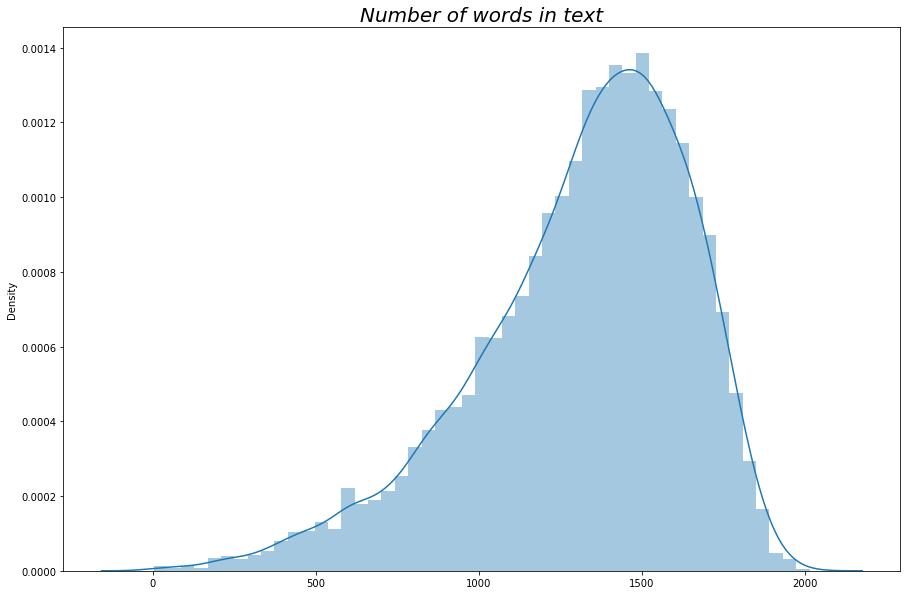

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(data_length,label='test data word length')
# px.histogram,(data_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [24]:
df.head(2)

,tweet_nbr,type,posts,post_len,words,category_id
0,0,INFJ,and intj moments sportscenter not top t...,4652,11.12,0
1,1,ENTP,i m finding the lack of me in these posts ver...,7053,23.40,1


### Tokenizing words

In [25]:
posts_str = df["posts"].str
def tokens(posts_str):

    return posts_str.split(',')

In [26]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer=TfidfVectorizer(max_features=9000, stop_words='english',tokenizer=tokens(posts_str))
# vectorizer.fit(df.posts)

In [28]:
vectorizer

TfidfVectorizer(max_features=9000, stop_words='english',
                tokenizer=0       [   and intj moments     sportscenter not top ...
1       [ i m finding the lack of me in these posts ve...
2       [ good one            course  to which i say i...
3       [ dear intp    i enjoyed our conversation the ...
4       [ you re fired    that s another silly misconc...
                              ...                        
8670    [   just because i always think of cats as fi ...
8671    [ so   if this thread already exists someplace...
8672    [ so many questions when i do these things   i...
8673    [ i am very conflicted right now when it comes...
8674    [ it has been too long since i have been on pe...
Name: posts, Length: 8675, dtype: object)

In [29]:
df.shape

(8675, 6)

In [30]:
from collections import Counter

In [31]:
list_words = list()
for i in list(df['posts']):
    for j in i.split(' '):
        list_words.append(j)

In [32]:
words_dic = Counter(list_words)
words_dic = pd.DataFrame({'word':list(words_dic.keys()),'Frequency':list(words_dic.values())})
words_dic.sort_values('Frequency',ascending=False,inplace=True)
words_dic.set_index('word',inplace=True)
print(len(words_dic))
words_dic.head()

106661


,Frequency
word,
,3666383
i,632415
the,309149
to,305350
a,246774


### Build model

In [33]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.33, random_state=42,stratify=df.type)

In [34]:
train_data.shape

(5812, 6)

In [35]:
test_data.shape

(2863, 6)

### Tokenizing Words & Transforming data

In [36]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000024EEF33CE80>)

In [37]:
train_post=vectorizer.transform(train_data.posts).toarray()
train_post

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04996008],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
test_post=vectorizer.transform(test_data.posts).toarray()
test_post

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

### Logistic Regression Model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, max_iter=3000, n_jobs=-1)

In [41]:
train_post=vectorizer.transform(train_data.posts).toarray()
train_post

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04996008],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [42]:
test_post=vectorizer.transform(test_data.posts).toarray()
test_post

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.15      0.26       127
        ENFP       0.83      0.64      0.72       452
        ENTJ       0.96      0.28      0.43       155
        ENTP       0.85      0.67      0.75       459
        ESFJ       0.00      0.00      0.00        28
        ESFP       0.00      0.00      0.00        32
        ESTJ       0.00      0.00      0.00        26
        ESTP       1.00      0.03      0.06        60
        INFJ       0.74      0.83      0.78       985
        INFP       0.64      0.93      0.75      1227
        INTJ       0.73      0.81      0.77       731
        INTP       0.69      0.88      0.77       874
        ISFJ       0.85      0.21      0.33       111
        ISFP       0.83      0.19      0.31       182
        ISTJ       0.84      0.20      0.32       137
        ISTP       0.86      0.47      0.61       226

    accuracy                           0.72      

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
models_accuracy={}
models_accuracy['Logistic Regression']=accuracy_score(test_target,model_log.predict(test_post))
models_accuracy['Logistic Regression']

0.6105483758295495

### Decision Tree Classification Model

In [45]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(max_depth=14)

In [46]:
print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.93      0.58      0.71       127
        ENFP       0.90      0.83      0.86       452
        ENTJ       0.91      0.73      0.81       155
        ENTP       0.92      0.79      0.85       459
        ESFJ       1.00      0.61      0.76        28
        ESFP       0.86      0.38      0.52        32
        ESTJ       1.00      0.23      0.38        26
        ESTP       0.97      0.50      0.66        60
        INFJ       0.88      0.86      0.87       985
        INFP       0.66      0.95      0.78      1227
        INTJ       0.89      0.80      0.84       731
        INTP       0.83      0.84      0.84       874
        ISFJ       0.93      0.63      0.75       111
        ISFP       0.97      0.66      0.78       182
        ISTJ       1.00      0.58      0.74       137
        ISTP       0.98      0.71      0.83       226

    accuracy                           0.82      

In [47]:
models_accuracy['Decision Tree Classification']=accuracy_score(test_target,model_tree.predict(test_post))
models_accuracy['Decision Tree Classification']

0.49563395040167657

### Linear Support Vector Classifier LSVC Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1)

In [49]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.88      0.48      0.62       127
        ENFP       0.85      0.79      0.82       452
        ENTJ       0.94      0.65      0.77       155
        ENTP       0.85      0.82      0.84       459
        ESFJ       0.86      0.21      0.34        28
        ESFP       1.00      0.19      0.32        32
        ESTJ       1.00      0.38      0.56        26
        ESTP       0.91      0.52      0.66        60
        INFJ       0.83      0.86      0.84       985
        INFP       0.77      0.93      0.84      1227
        INTJ       0.84      0.86      0.85       731
        INTP       0.82      0.90      0.86       874
        ISFJ       0.94      0.65      0.77       111
        ISFP       0.90      0.59      0.72       182
        ISTJ       0.90      0.66      0.76       137
        ISTP       0.89      0.82      0.85       226

    accuracy                           0.83      

In [50]:
models_accuracy['Linear Support Vector Classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))
models_accuracy['Linear Support Vector Classifier']

0.6545581557806497

### Vector Classifier Model

In [51]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC()

In [52]:
print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.98      0.84      0.91       127
        ENFP       0.97      0.94      0.96       452
        ENTJ       0.99      0.91      0.95       155
        ENTP       0.95      0.97      0.96       459
        ESFJ       1.00      0.50      0.67        28
        ESFP       1.00      0.31      0.48        32
        ESTJ       1.00      0.62      0.76        26
        ESTP       1.00      0.83      0.91        60
        INFJ       0.95      0.97      0.96       985
        INFP       0.92      0.99      0.95      1227
        INTJ       0.97      0.97      0.97       731
        INTP       0.94      0.97      0.96       874
        ISFJ       1.00      0.89      0.94       111
        ISFP       0.98      0.89      0.93       182
        ISTJ       0.96      0.92      0.94       137
        ISTP       0.98      0.93      0.95       226

    accuracy                           0.95      

In [53]:
models_accuracy['Support Vector Classifier']=accuracy_score(test_target,model_svc.predict(test_post))
models_accuracy['Support Vector Classifier']

0.6336011177086972

In [54]:
models_accuracy

{'Logistic Regression': 0.6105483758295495,
 'Decision Tree Classification': 0.49563395040167657,
 'Linear Support Vector Classifier': 0.6545581557806497,
 'Support Vector Classifier': 0.6336011177086972}

### Random Classifier Model

In [55]:
model_forest=RandomForestClassifier(max_depth=16)
model_forest.fit(train_post,train_target)

RandomForestClassifier(max_depth=16)

In [56]:
print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.55      0.71       127
        ENFP       1.00      0.90      0.95       452
        ENTJ       1.00      0.77      0.87       155
        ENTP       0.99      0.93      0.96       459
        ESFJ       1.00      0.29      0.44        28
        ESFP       1.00      0.28      0.44        32
        ESTJ       1.00      0.23      0.38        26
        ESTP       1.00      0.52      0.68        60
        INFJ       0.95      0.99      0.97       985
        INFP       0.78      1.00      0.87      1227
        INTJ       0.98      0.97      0.97       731
        INTP       0.92      0.98      0.95       874
        ISFJ       1.00      0.60      0.75       111
        ISFP       1.00      0.70      0.82       182
        ISTJ       1.00      0.66      0.80       137
        ISTP       1.00      0.82      0.90       226

    accuracy                           0.91      

In [57]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))
models_accuracy['Random Forest Classifier']

0.5026196297589941

### Multinomial Naive Bayes

In [58]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB()

In [59]:
print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       127
        ENFP       1.00      0.01      0.01       452
        ENTJ       0.00      0.00      0.00       155
        ENTP       0.95      0.04      0.08       459
        ESFJ       0.00      0.00      0.00        28
        ESFP       0.00      0.00      0.00        32
        ESTJ       0.00      0.00      0.00        26
        ESTP       0.00      0.00      0.00        60
        INFJ       0.53      0.64      0.58       985
        INFP       0.35      0.95      0.51      1227
        INTJ       0.81      0.42      0.55       731
        INTP       0.62      0.63      0.62       874
        ISFJ       0.00      0.00      0.00       111
        ISFP       0.00      0.00      0.00       182
        ISTJ       0.00      0.00      0.00       137
        ISTP       0.00      0.00      0.00       226

    accuracy                           0.46      

In [60]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))
models_accuracy['Multinomial Naive Bayes']

0.3677960181627663

### Summary of all models accuracy

In [61]:
models_accuracy

{'Logistic Regression': 0.6105483758295495,
 'Decision Tree Classification': 0.49563395040167657,
 'Linear Support Vector Classifier': 0.6545581557806497,
 'Support Vector Classifier': 0.6336011177086972,
 'Random Forest Classifier': 0.5026196297589941,
 'Multinomial Naive Bayes': 0.3677960181627663}

In [62]:
models_accuracy.keys()

dict_keys(['Logistic Regression', 'Decision Tree Classification', 'Linear Support Vector Classifier', 'Support Vector Classifier', 'Random Forest Classifier', 'Multinomial Naive Bayes'])

In [63]:
accuracy_df = pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy']).sort_values(by='Test accuracy',ascending=False,ignore_index=True)
accuracy_df

,Models,Test accuracy
0,Linear Support Vector Classifier,0.654558
1,Support Vector Classifier,0.633601
2,Logistic Regression,0.610548
3,Random Forest Classifier,0.502620
4,Decision Tree Classification,0.495634
5,Multinomial Naive Bayes,0.367796


In [64]:
accuracy_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='viridis')

,Models,Test accuracy
0,Linear Support Vector Classifier,0.654558
1,Support Vector Classifier,0.633601
2,Logistic Regression,0.610548
3,Random Forest Classifier,0.502620
4,Decision Tree Classification,0.495634
5,Multinomial Naive Bayes,0.367796


In [65]:
px.bar(accuracy_df, x='Test accuracy', y="Models", color="Models", title='Models Accuracy Comparision')

### Save the model with highest accuracy score (LSVC model) using pickle 

In [66]:
model_linear_svc=LinearSVC(C=0.1)
lsvc = model_linear_svc.fit(train_post,train_target)
lsvc

LinearSVC(C=0.1)

In [67]:
# Create pickle file
import pickle 
lsvcPickle = open('../models/LSVC_MBTI_classification', 'wb') 

# Save the trained model with one of the highest accuracy (i.e. LSVC) to file 
pickle.dump(lsvc, lsvcPickle)     
lsvcPickle.close()